In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.decomposition import PCA
from sklearn.cluster import MeanShift
from sklearn.cluster import KMeans

%matplotlib inline

# Read the shoe data

In [3]:
shoe_data = pd.read_csv('Shoes.csv',encoding = "ISO-8859-1")

In [4]:
x = shoe_data['Gender']
x.value_counts()

Women     11100
Men        7253
Girls      2659
Boys       2546
Womens     1008
Mens        595
Unisex       96
Name: Gender, dtype: int64

### Filters the Data by Women, Men, Girls, Boys and Unisex

In [5]:
# Women
Women_Data = shoe_data[(shoe_data['Gender']=='Women') | 
                       (shoe_data['Gender']=='Womens')] 
Women_Data['Gender'].value_counts()
Women_Shoes = Women_Data['Row'] # number for the shoes

# Men
Men_Data = shoe_data[(shoe_data['Gender']=='Men') | 
                       (shoe_data['Gender']=='Mens')] 
Men_Data['Gender'].value_counts()
Men_Shoes = Men_Data['Row']

# Girls
Girls_Data = shoe_data[(shoe_data['Gender']=='Girls')] 
Girls_Data['Gender'].value_counts()
Girls_Shoes = Girls_Data['Row']

# Boys
Boys_Data = shoe_data[(shoe_data['Gender']=='Boys')] 
Boys_Data['Gender'].value_counts()
Boys_Shoes = Boys_Data['Row']

# Unisex
Unisex_Data = shoe_data[(shoe_data['Gender']=='Unisex')] 
Unisex_Data['Gender'].value_counts()
Unisex_Shoes = Unisex_Data['Row']

### Read the Feature Data

In [6]:
df = pd.read_csv('features.csv')
df.tail()

,shoe_number,0,1,2,3,4,5,6,7,8,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
25253,25253,0.000000,0.00000,2.822442,0.000000,0.0,1.100513,0.0,3.466933,0.0,...,0.0,2.238948,0.0,2.618712,0.0,0.000000,0.0,2.934636,0.0,1.678181
25254,25254,0.000000,1.06385,0.183473,1.444844,0.0,0.563876,0.0,0.558887,0.0,...,0.0,0.492249,0.0,3.365807,0.0,0.000000,0.0,2.263286,0.0,0.000000
25255,25255,0.050072,0.00000,2.465157,0.000000,0.0,0.282674,0.0,0.000000,0.0,...,0.0,0.197933,0.0,3.513182,0.0,2.358734,0.0,5.324767,0.0,0.630338
25256,25256,0.000000,0.00000,3.475690,0.000000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.531141,0.0,5.769824,0.0,0.000000,0.0,4.421978,0.0,2.824965
25257,25257,0.000000,0.00000,0.173585,0.000000,0.0,0.000000,0.0,5.833847,0.0,...,0.0,2.430494,0.0,5.797440,0.0,1.900185,0.0,2.878265,0.0,0.000000


In [7]:
# uses the shoe number as the index
df.set_index('shoe_number',inplace=True)

In [8]:
Women_Features = df.loc[Women_Shoes]
Men_Features = df.loc[Men_Shoes]
Girls_Features = df.loc[Girls_Shoes]
Boys_Features = df.loc[Boys_Shoes]
Unisex_Features = df.loc[Unisex_Shoes]

# Women_Features.head()

In [10]:
ms = MeanShift()
ms.fit(Unisex_Features)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [11]:
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)
n_clusters_

5

In [12]:
y = ms.predict(Unisex_Features)

In [24]:
x = pd.DataFrame(Unisex_Shoes)
x['cluster'] = y
x

,Row,cluster
570,571,0
627,628,0
713,714,0
714,715,0
823,824,0
1127,1128,0
1819,1820,0
2117,2118,0
2118,2119,0
2119,2120,0


In [26]:
x.cluster.value_counts()

0    91
1     2
4     1
3     1
2     1
Name: cluster, dtype: int64

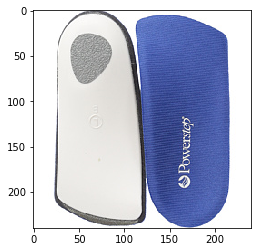

In [42]:
img = plt.imread('Old/Transfer_Learning_Shoes/ZShoes/Images/2119.jpg')
plt.imshow(img);

In [28]:
!pwd

/Users/robertomac/Dropbox/Metis/blogs/2018/Transfer_Learning_Shoes


ValueError: x and y must have same first dimension, but have shapes (40,) and (1,)

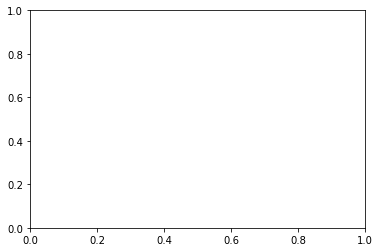

In [57]:
inertia = []
max_range = 201
steps = 5
for i in range(200,max_range,steps):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)
plt.plot(range(2,max_range,steps),inertia)
plt.scatter(range(2,max_range,steps),inertia)

In [321]:
kmeans = KMeans(n_clusters=25, random_state=0)
kmeans.fit_predict(df)

array([12, 16,  0, ..., 21, 22, 22], dtype=int32)

In [323]:
l2=pd.Series(kmeans.labels_)
l2.value_counts()

15    1569
21    1529
3     1366
0     1296
13    1240
19    1234
16    1213
22    1194
2     1060
4     1059
1     1010
12     980
18     976
20     971
7      959
24     956
23     944
11     935
10     826
9      813
5      773
17     757
6      744
8      727
14     127
dtype: int64

In [53]:
# inert = pd.DataFrame(inertia)

In [56]:
# inert.to_csv('Inertia.csv')

In [58]:
inertia

[51640175.346758343]

In [ ]:
df = pd.read_csv('features.csv')
df.tail()

In [ ]:
pca = PCA(n_components=2)
pca.fit(df)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
res = pca.transform(df)

In [ ]:
plt.scatter(res[:,0],res[:,1],alpha=0.1,s=1)

In [ ]:
plt.hist(res[:,1],100);

In [116]:
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn import preprocessing

In [216]:
len(Women_Features)
len(Men_Features)
len(Girls_Features)
len(Boys_Features)
len(Unisex_Features)

2546

In [217]:
# X = preprocessing.scale(Unisex_Features)
X = np.array(Unisex_Features)

In [218]:
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1, n_samples=500)

In [281]:
bandwidth = 700.0

In [282]:
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)

In [283]:
ms.fit(X)

MeanShift(bandwidth=700.0, bin_seeding=True, cluster_all=True, min_bin_freq=1,
     n_jobs=1, seeds=None)

In [284]:
labels = ms.labels_
x=pd.Series(labels)
x.value_counts()

0    96
dtype: int64

In [210]:
ind = Unisex_Features.index

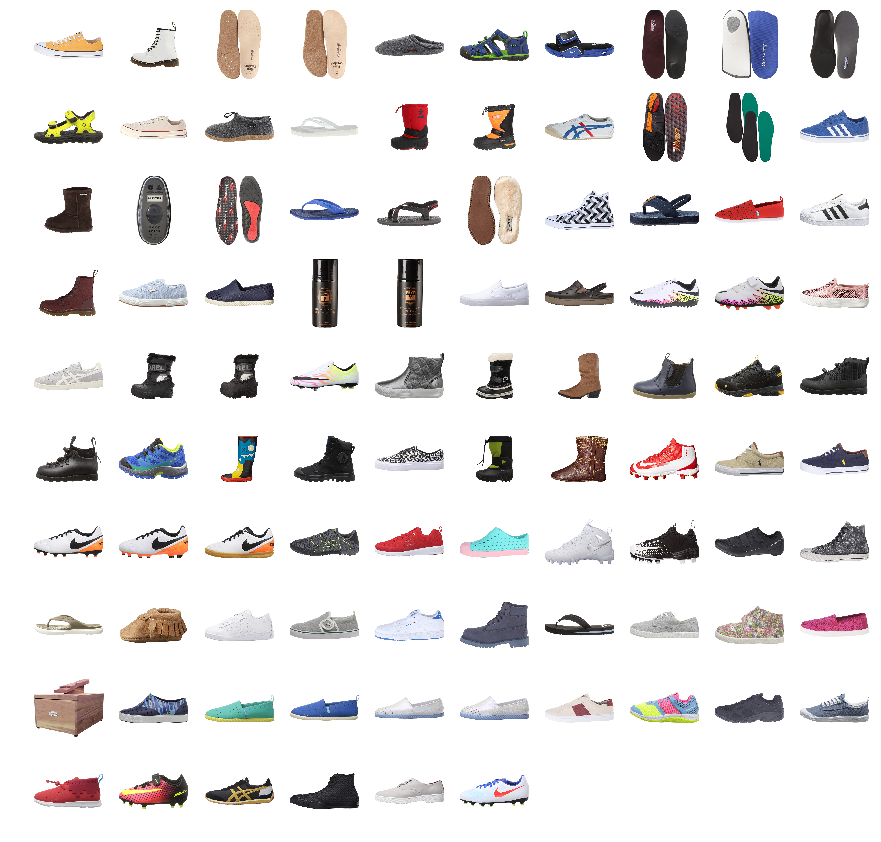

In [286]:
plt.figure(figsize=[15,15])
for i,img_ind in enumerate(ind):
    loc = 'Old/Transfer_Learning_Shoes/ZShoes/Images/{}.jpg'.format(img_ind)
    img = plt.imread(loc)
    plt.subplot(10,10,i+1)
    plt.axis('off')
    plt.imshow(img);

In [302]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score

In [310]:
X = np.array(Boys_Features)

In [313]:
sil = []
for i in range(5,50,10):
    model = AgglomerativeClustering(n_clusters=i,
                                        linkage="ward")
    labels = model.fit_predict(X)
    sil.append(silhouette_score(X, labels))

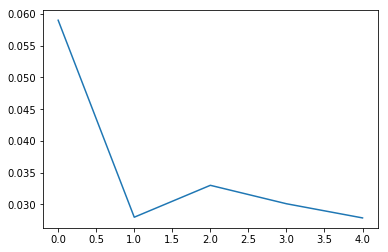

In [314]:
plt.plot(sil)

In [320]:
l = pd.Series(labels)
l.value_counts()

4     140
10    111
2     102
5     102
14     97
13     81
21     80
32     77
16     73
12     70
28     70
22     69
6      68
15     63
3      62
38     62
1      59
25     59
9      58
30     58
18     58
8      57
40     56
19     56
23     49
0      49
37     46
29     46
7      45
39     43
20     41
43     41
33     40
11     37
17     37
24     34
42     33
34     31
27     31
35     31
41     29
26     26
31     26
44     25
36     18
dtype: int64